# Concatenate NetCDF Files

## Imports

In [1]:
import glidertools as gt
from cmocean import cm as cmo
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import cmocean
from matplotlib import colors
import netCDF4
from netCDF4 import Dataset
import glob
import os

## Glider Tools

In [2]:
filenames = 'C:/Users/marqjace/OneDrive - Oregon State University/Desktop/SG685/t_anom/individual_dives/first_line_inbound/p685*.nc'

gt.load.seaglider_show_variables(filenames)

names = [
    'ctd_depth',
    'ctd_time',
    'ctd_pressure',
    'salinity',
    'temperature',
]

ds_dict = gt.load.seaglider_basestation_netCDFs(
    filenames, names,
    return_merged=True,
    keep_global_attrs=False
)

print(ds_dict.keys())

information is based on file: C:/Users/marqjace/OneDrive - Oregon State University/Desktop/SG685/t_anom/individual_dives/first_line_inbound\p6850140.nc

DIMENSION: sg_data_point
{ctd_pressure, longitude, latitude, salinity, temperature, ctd_depth, ctd_time}


100%|██████████| 53/53 [00:00<00:00, 69.73it/s]



Cannot merge data - not enough time indexed DataFrames
Returning unmerged dataframes
dict_keys(['sg_data_point'])


In [3]:
sg_data_point = ds_dict['sg_data_point']

dat = sg_data_point.rename({
    'salinity': 'salt_raw',
    'temperature': 'temp_raw',
    'ctd_pressure': 'pressure',
    'ctd_depth': 'depth',
    'ctd_time': 'time_raw',
})

print(dat)

# variable assignment for conveniant access
depth = dat.depth
dives = dat.dives
lats = dat.latitude
lons = dat.longitude
pres = dat.pressure
temp = dat.temp_raw
salt = dat.salt_raw


# name coordinates for quicker plotting
x = dat.longitude
y = dat.depth

<xarray.Dataset>
Dimensions:        (sg_data_point: 79938)
Coordinates:
    ctd_time_dt64  (sg_data_point) datetime64[ns] 2023-11-05T19:21:32 ... 202...
    longitude      (sg_data_point) float64 -126.7 -126.7 ... -124.4 -124.4
    latitude       (sg_data_point) float64 41.06 41.06 41.06 ... 41.07 41.07
    depth          (sg_data_point) float64 0.5656 0.6659 ... -0.06155 0.01443
Dimensions without coordinates: sg_data_point
Data variables:
    pressure       (sg_data_point) float64 0.5707 0.6719 ... -0.06178 0.01479
    salt_raw       (sg_data_point) float64 nan nan nan nan ... nan nan nan nan
    temp_raw       (sg_data_point) float64 14.57 14.59 14.59 ... 14.4 14.39
    time_raw       (sg_data_point) float64 1.699e+09 1.699e+09 ... 1.7e+09
    dives          (sg_data_point) float64 114.0 114.0 114.0 ... 166.5 166.5
Attributes:
    date_created:             2024-01-10 11:02:46
    number_of_dives:          166.0
    files:                    ['first_line_inbound\\p6850114.nc', 'first

In [4]:
# Set up new grid (96 points longitude is every 5 km, 200 points depth is every 5 meters)


# number of grid points:

xn, yn = 96, 200


# grid window

xmin, xmax = -130.5, -124.5
ymin, ymax = 0, 1000


# Generate a regular grid to interpolate the data

xgrid = np.linspace(xmin, xmax, xn)
ygrid = np.linspace(ymin, ymax, yn)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)


# Interpolate using "linear" method

Z = griddata(points = (lons, depth),
              values = temp,
              xi = (Xgrid, Ygrid),
              method = 'linear')

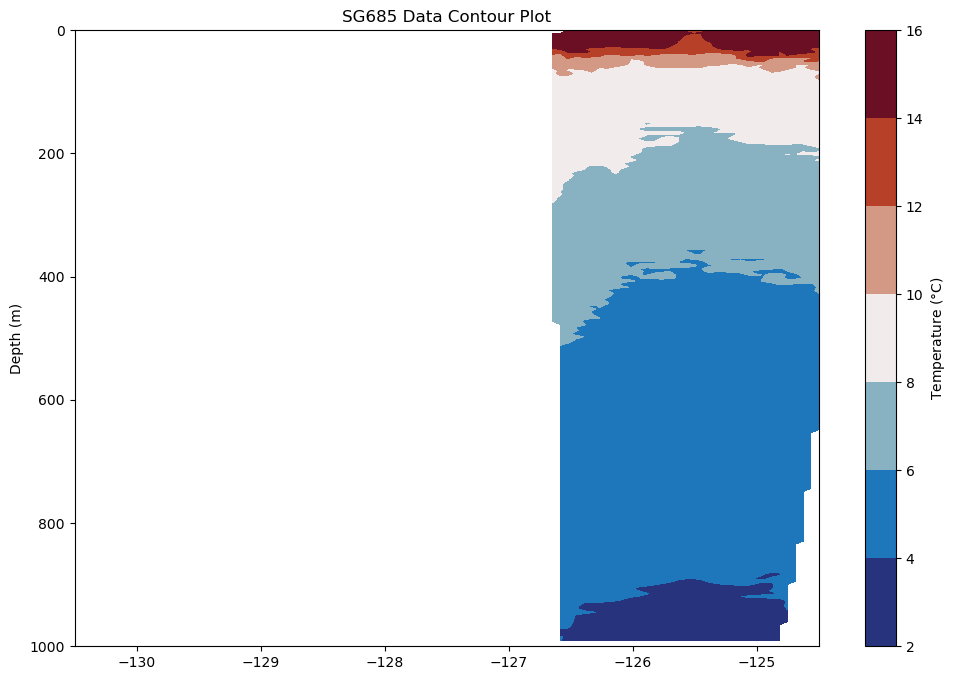

In [5]:
fig, ax = plt.subplots(figsize=(12,8))

scat = ax.contourf(Xgrid, Ygrid, Z, cmap=cmo.balance)
ax.invert_yaxis()
ax.set_title('SG685 Data Contour Plot')
ax.set_ylabel('Depth (m)')
plt.colorbar(scat, label=r'Temperature ($\degree$C)')